# Forward Contracts

## Load Packages

In [1]:
using Dates       

include("jlFiles/printmat.jl")
include("jlFiles/printTable.jl")

printblue (generic function with 1 method)

In [2]:
using Plots

#pyplot(size=(600,400))
gr(size=(480,320))
default(fmt = :svg)

# Present Value

In [3]:
y  = 0.05
m  = 3/4
Z  = 100
PV = exp(-y*m)*Z

printlnPs("PV of $Z: ",PV)

PV of 100:     96.319


# Payoff of Forward Contract

Recall: the payoff of a forward contract (at expiration, $m$ periods ahead) is $S_{m}-F$

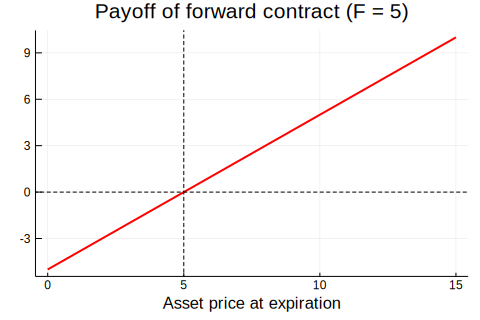

In [4]:
Sₘ = 0:15   #possible values of the underlying price at expiration
F  = 5
ForwardPayoff = Sₘ .- F

p1 = plot(Sₘ,ForwardPayoff,color=:red,linewidth=2,legend=false)
title!("Payoff of forward contract (F = $F)")
xlabel!("Asset price at expiration")
plot!([0],linetype=:hline,linecolor=:black,line=(:dash,1))
plot!([F],linetype=:vline,linecolor=:black,line=(:dash,1))

# Forward-Spot Parity

Recall: for an asset without dividends (at least until expiration of the forward contract), $F=e^{my}S$

For an asset with continuous dividends at the rate $\delta$, $F=e^{m(y-\delta)}S$

In [5]:
y = 0.05
m = 3/4
S = 100 
F_A = exp(m*y)*S

δ = 0.01
F_B = exp(m*(y-δ))*S

printblue("Forward prices:")
printTable([F_A F_B],["no dividends";"with dividends"],[""],width=16)

Forward prices:
    no dividends  with dividends
         103.821         103.045



### Forward Price of a Bond

Recall: the forward price (with expiration $m$ of the forward) of a bond that matures in $n$ is $F=e^{my(m)}B(n)$, where $y(m)$ denotes the interest for an $m$-period loan.

By definition, $1/B(m)= e^{my(m)}$. Combine to get 

$F=B(n)/B(m)$

In [6]:
m  = 5                      #time to maturity
n  = 7
ym = 0.05                  #interest rates 
yn = 0.06
Bm = exp(-m*ym)            #bond price
Bn = exp(-n*yn)
F = Bn/Bm

printblue("bond and forward prices: ")
xx = [Bm,Bn,F]
printTable(xx,["price"],["$m-bond","$n-bond","$m->$n forward"])

bond and forward prices: 
                 price
5-bond           0.779
7-bond           0.657
5->7 forward     0.844



### Covered Interest Rate Parity

The "dividend rate" on foreign currency is the foreign interest rate $y^*$ (since you can keep the foreign currency on a foreign bank account). The forward-spot parity then gives
$F=e^{m(y-y^*)}S$.

We also calculate the return on a "covered" strategy: (a) buy foreign currency; (b) lend it abroad; (c) enter a forward on the domestic currency; (d) pay forward price and get domestic currency.

In [7]:
S     = 1.2
m     = 1
y     = 0.0665
ystar = 0.05

F = S*exp(m*(y-ystar))

printlnPs("Forward price of foreign currency: ",F)

TradingReturn = exp(ystar)*F/S - 1
logTR         = log(TradingReturn+1)

printlnPs("\nlog return on covered strategy:     ",100*logTR)
printlnPs("compare with domestic interest rate:",y*100)

Forward price of foreign currency:      1.220

log return on covered strategy:          6.650
compare with domestic interest rate:     6.650
